In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Life expectancy.csv')
df.head(10)

,Entity,Year,Life expectancy
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999
5,Australia,1807,34.049999
6,Australia,1808,34.049999
7,Australia,1809,34.049999
8,Australia,1810,34.049999
9,Australia,1811,34.049999


In [ ]:
df.describe()

,Year,Life expectancy
count,3253.000000,3253.000000
mean,1908.066093,48.680380
std,62.613962,17.965669
min,1800.000000,8.108836
25%,1854.000000,32.000000
50%,1908.000000,41.880001
75%,1962.000000,66.820000
max,2016.000000,83.940002


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 
X = df.loc[:, ['Year','Life expectancy']].values

In [ ]:
wcss = []
for k in range(1,11): 
     kmeans = KMeans(n_clusters = k, random_state = 0)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

# Elbow plot to determine good choice of k

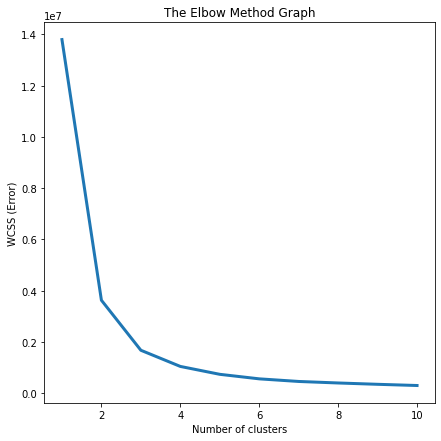

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(range(1,11), wcss, linewidth = 3)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Error)')
plt.show()

# What Caused the sudden upwards spike in Life Expectancy

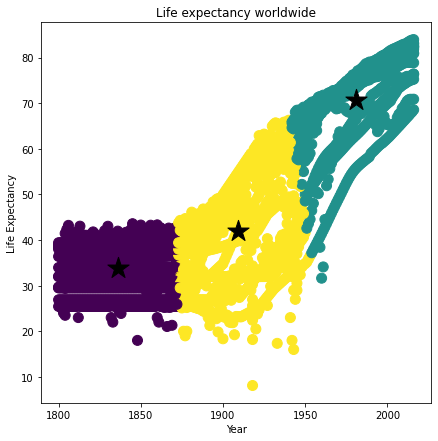

In [ ]:
kmeans = KMeans(n_clusters=3, init ='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 100)

# Plot the centroids
plt.rcParams["figure.figsize"] = (10,10)

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 500, 
            c = 'black')

plt.title('Life expectancy worldwide')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

# **Re-work Data set to capture the inntial spike**

In [ ]:
X = df.loc[60:90, ['Year','Life expectancy']].values

wcss = []
for k in range(1,11): 
     kmeans = KMeans(n_clusters = k, random_state = 0)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

# ** Find a good choice for K**

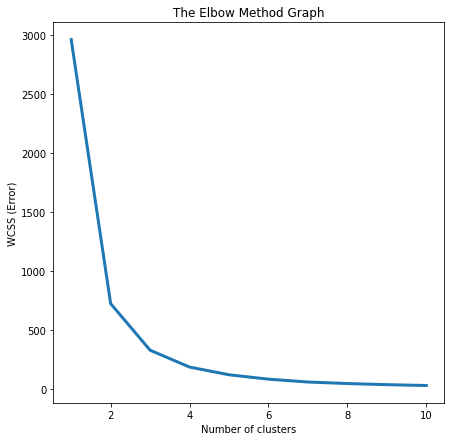

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(range(1,11), wcss, linewidth = 3)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Error)')
plt.show()

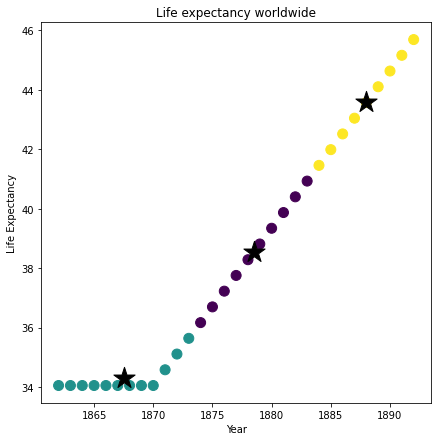

In [ ]:
kmeans = KMeans(n_clusters=3, init ='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 100)

# Plot the centroids
plt.rcParams["figure.figsize"] = (10,10)

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 500, 
            c = 'black')

plt.title('Life expectancy worldwide')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

# **This shows us The spike started in 1870**

This year was filled with technoligical advancements. One dare say it was like a technological revolution. If you'd like to follow the events more closely please refer to : https://www.thepeoplehistory.com/1870to1879.html

Dataset Acquired from:
https://www.kaggle.com/brendan45774/countries-life-expectancy

# **Now let's analyze that one outlier we had in our first evaluation.**

In [ ]:
X = df.loc[100:120, ['Year','Life expectancy']].values

wcss = []
for k in range(1,11): 
     kmeans = KMeans(n_clusters = k, random_state = 0)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)

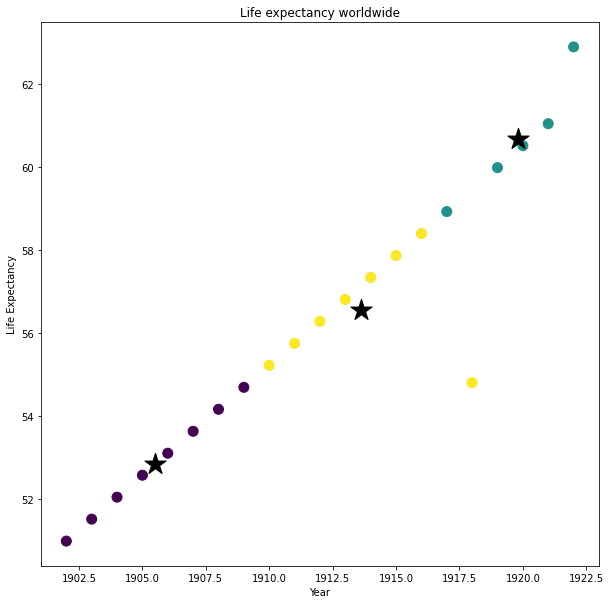

In [ ]:
kmeans = KMeans(n_clusters=3, init ='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 100)

# Plot the centroids
plt.rcParams["figure.figsize"] = (10,10)

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            marker = '*', 
            s = 500, 
            c = 'black')

plt.title('Life expectancy worldwide')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

# **Now lets filter our data set to find which countries are responsible and what story it holds for us.**

In [ ]:
y = df.loc[115:120, :]
print(y)

        Entity  Year  Life expectancy
115  Australia  1917        58.923138
116  Australia  1918        54.802391
117  Australia  1919        59.981567
118  Australia  1920        60.510784
119  Australia  1921        61.040001
120  Australia  1922        62.889999


# **Looks like cell 116 is Australia in 1916 is our outlier**

This was amidst WWI and makes perfect sense also this was the year in which Australia was dominated in WWI and took heavy losses to their population. Heres is a wikipedia page on the year :

https://en.wikipedia.org/wiki/1918_in_Australia

Which now looking back at most of our outliers it falls within WWI time frame. That concludes everything I can currently extract from this data set.

